In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [2]:
cwd = "c:\\Users\\m1865\\Desktop\\DISC"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"

In [3]:
pd_Variogram = pd.read_csv(cwd + "\\Result - Variogram.csv")
pd_Variogram.head()

,Distance,STD,CV,Range,Sill,Nugget
0,30,10.292980,0.256794,20.000000,71.762211,3.570080e+01
1,100,15.866641,0.478179,70.000000,267.887789,5.104219e-14
2,300,20.748732,0.428943,104.664412,449.836840,6.333086e+01
3,900,20.035755,0.502820,345.097181,438.814722,1.064037e+02
4,1200,19.909969,0.527853,327.228777,419.066655,8.059260e+01


In [4]:
pd_Roman = pd.read_csv(cwd + "\\Result - Roman.csv")
pd_Roman.head()

,Internal Distance,External Distance,Rcv,Rse,Rst,Rsv,RAW Score,ST Score
0,30,100,0.862114,0.784802,0.990000,5.965000,0.579970,0.294941
1,30,300,0.670379,0.788821,0.694206,7.947945,0.745846,0.256871
2,100,300,-0.102966,0.923035,-0.148640,0.284701,4.855959,0.907602
3,300,900,0.172231,0.954540,-0.119004,1.906935,2.903070,0.592676
4,300,1200,0.230590,0.954330,-0.075508,1.938959,2.168347,0.587308


[Text(0, 0, '33'),
 Text(0, 0, '149'),
 Text(0, 0, '108'),
 Text(0, 0, '45'),
 Text(0, 0, '25'),
 Text(0, 0, '18'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

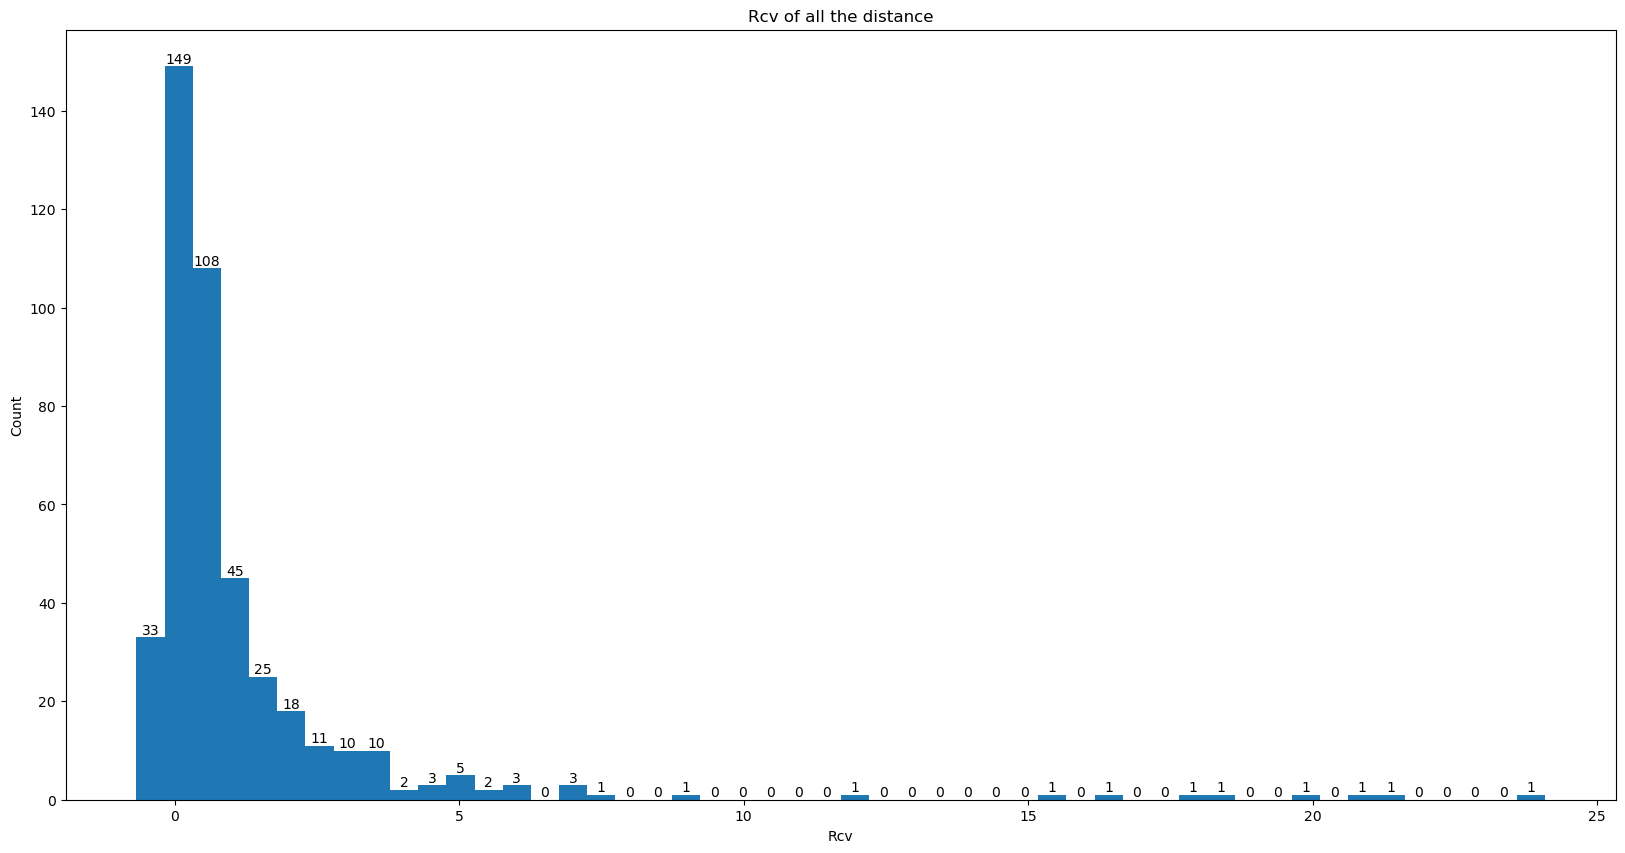

In [5]:
plt.figure(figsize = (20,10))
plt.title("Rcv of all the distance")
counts, edges, bars = plt.hist(pd_Roman["Rcv"], bins = 50)
plt.xlabel("Rcv")
plt.ylabel("Count")
plt.bar_label(bars)

In [15]:
pd_Roman["Rcv"] = abs(pd_Roman["Rcv"])

[Text(0, 0, '23'),
 Text(0, 0, '16'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

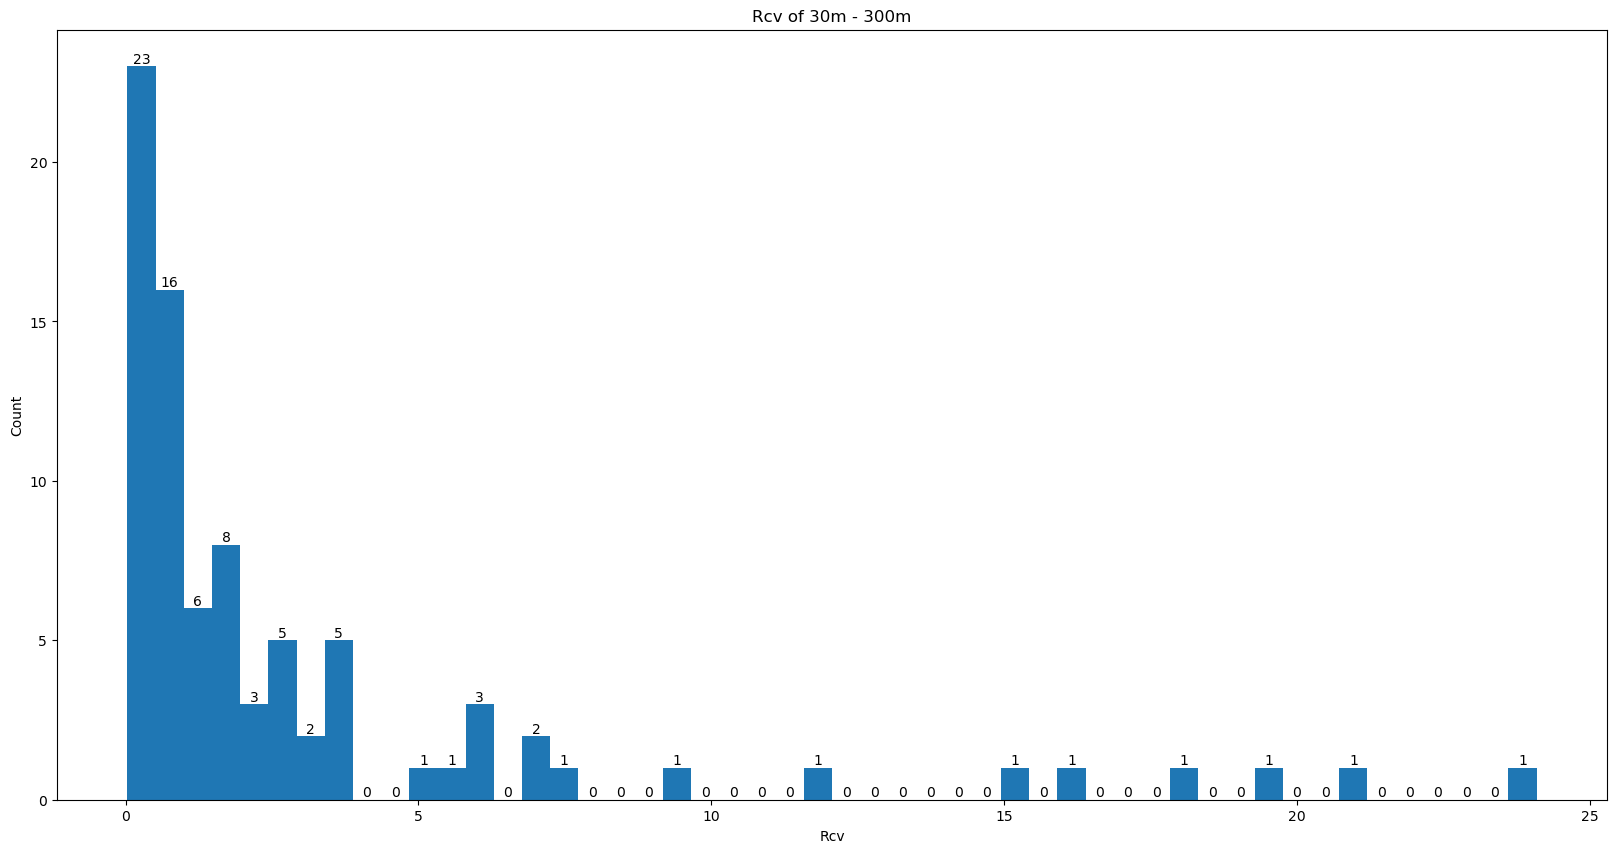

In [16]:
plt.figure(figsize = (20,10))
plt.title("Rcv of 30m - 300m")
counts, edges, bars = plt.hist(pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == 30) & (pd_Roman['External Distance'] == 300))]['Rcv'], bins = 50)
plt.xlabel("Rcv")
plt.ylabel("Count")
plt.bar_label(bars)

In [17]:
pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == 30) & (pd_Roman['External Distance'] == 300))]['Rcv'].describe()

count    84.000000
mean      3.168200
std       5.037578
min       0.031495
25%       0.489365
50%       1.204366
75%       3.303183
max      24.093581
Name: Rcv, dtype: float64

[Text(0, 0, '17'),
 Text(0, 0, '21'),
 Text(0, 0, '9'),
 Text(0, 0, '13'),
 Text(0, 0, '3'),
 Text(0, 0, '9'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '0'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

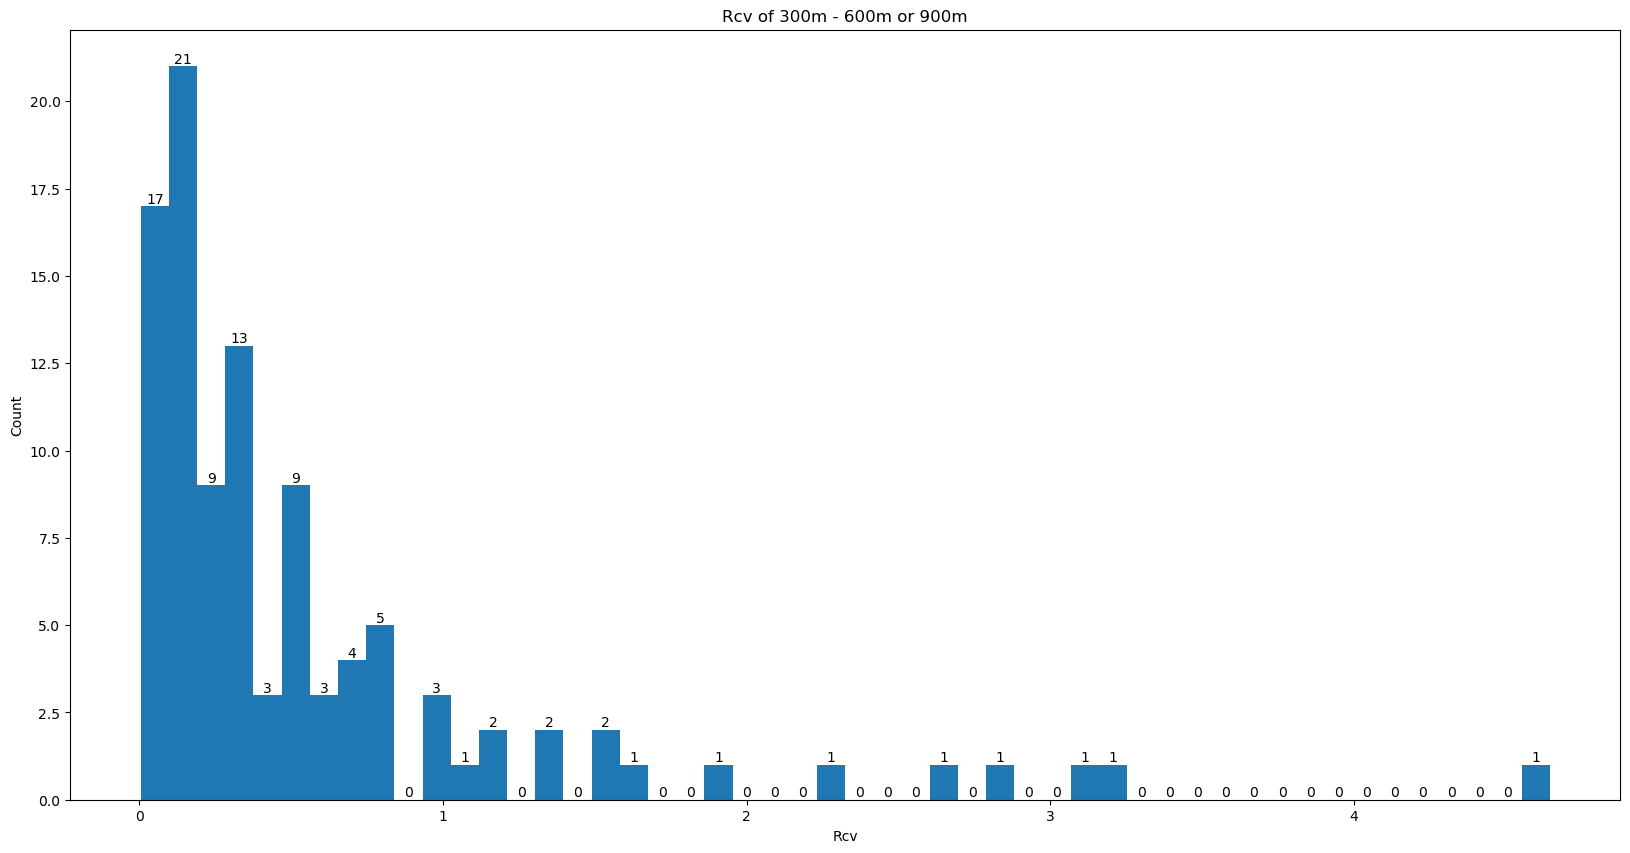

In [18]:
plt.figure(figsize = (20,10))
plt.title("Rcv of 300m - 600m or 900m")
counts, edges, bars = plt.hist(pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == 300) & (pd_Roman['External Distance'].isin([900,600])))]['Rcv'], bins = 50)
plt.xlabel("Rcv")
plt.ylabel("Count")
plt.bar_label(bars)

In [19]:
pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == 300) & (pd_Roman['External Distance'].isin([900,600])))]['Rcv'].describe()

count    102.000000
mean       0.577196
std        0.777632
min        0.005026
25%        0.131263
50%        0.300727
75%        0.680347
max        4.645335
Name: Rcv, dtype: float64

[Text(0, 0, '374'),
 Text(0, 0, '31'),
 Text(0, 0, '11'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

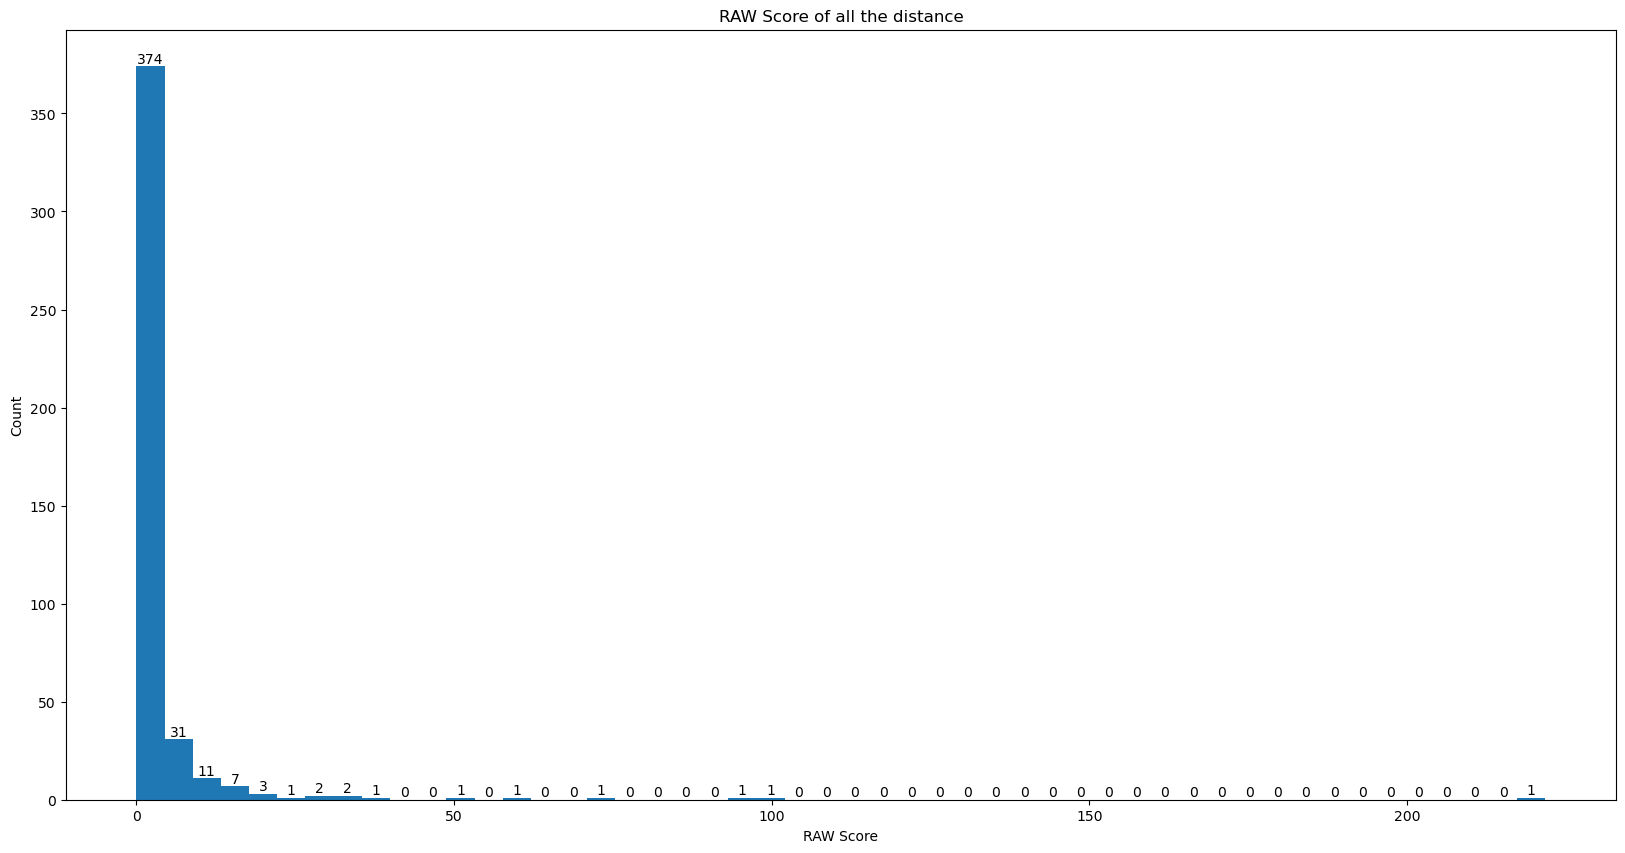

In [8]:
plt.figure(figsize = (20,10))
plt.title("RAW Score of all the distance")
counts, edges, bars = plt.hist(pd_Roman["RAW Score"], bins = 50)
plt.xlabel("RAW Score")
plt.ylabel("Count")
plt.bar_label(bars)

[Text(0, 0, '39'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

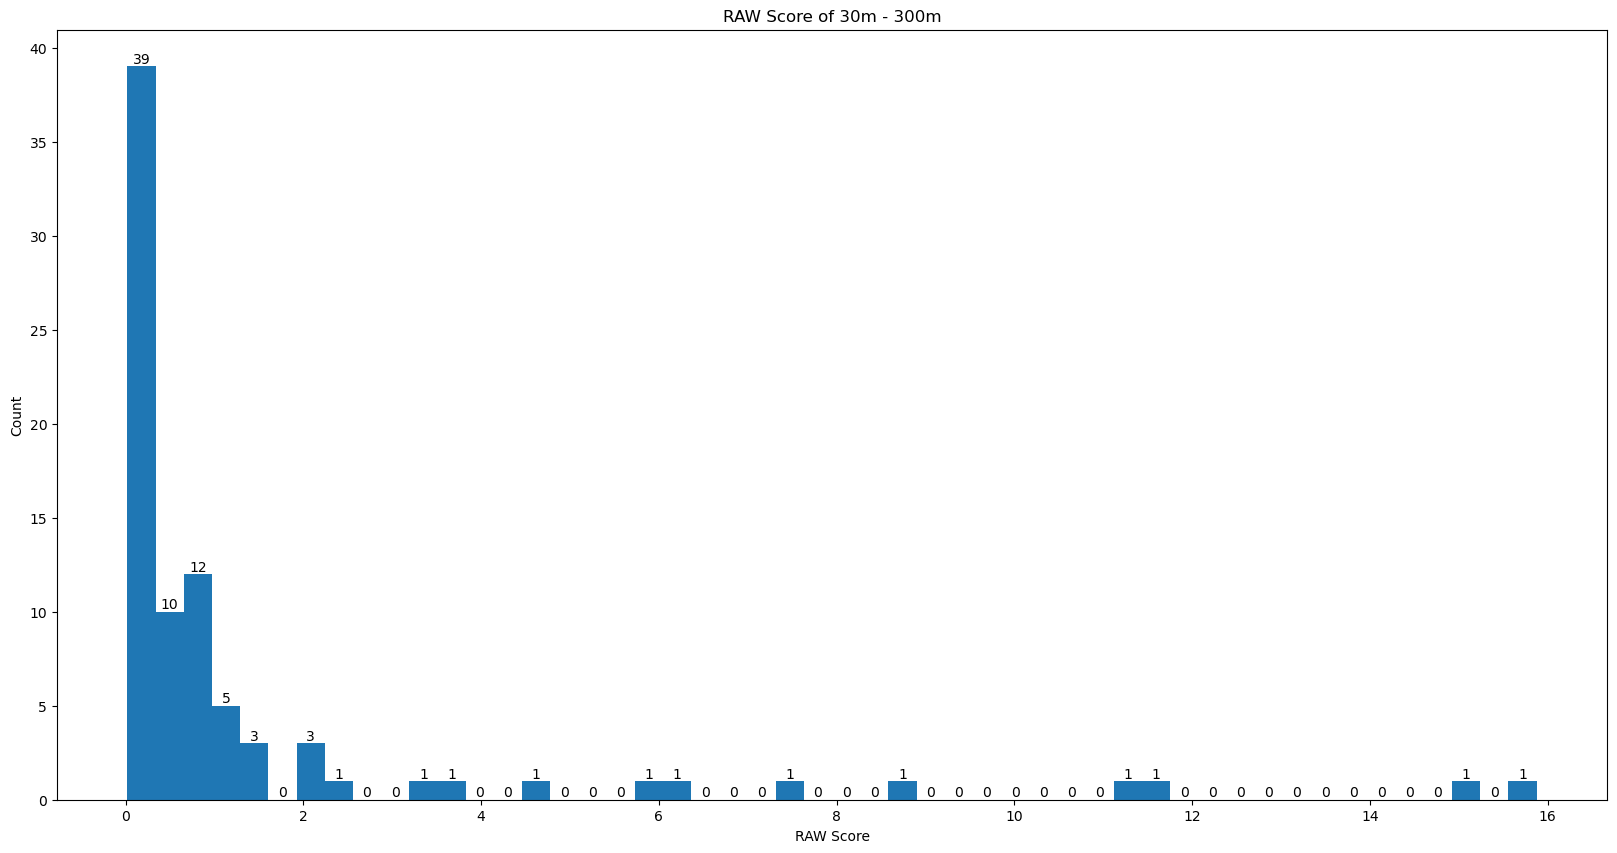

In [9]:
plt.figure(figsize = (20,10))
plt.title("RAW Score of 30m - 300m")
counts, edges, bars = plt.hist(pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == 30) & (pd_Roman['External Distance'] == 300))]['RAW Score'], bins = 50)
plt.xlabel("RAW Score")
plt.ylabel("Count")
plt.bar_label(bars)

In [10]:
pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == 30) & (pd_Roman['External Distance'] == 300))]['RAW Score'].describe()

count    84.000000
mean      1.580622
std       3.156204
min       0.020752
25%       0.151489
50%       0.415248
75%       1.021878
max      15.875549
Name: RAW Score, dtype: float64

[Text(0, 0, '58'),
 Text(0, 0, '20'),
 Text(0, 0, '9'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

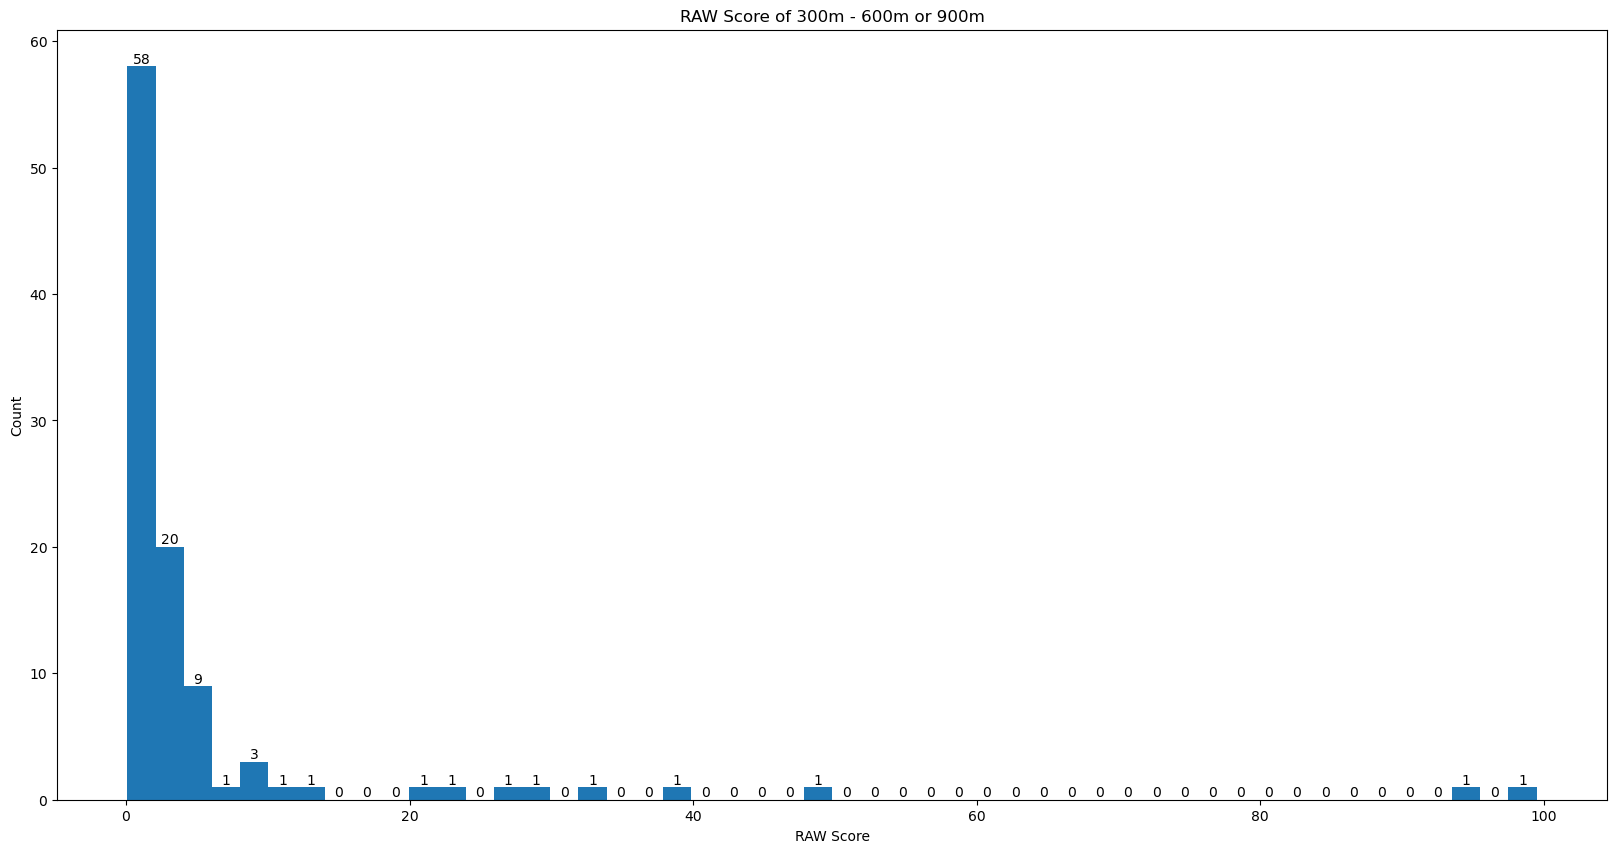

In [11]:
plt.figure(figsize = (20,10))
plt.title("RAW Score of 300m - 600m or 900m")
counts, edges, bars = plt.hist(pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == 300) & (pd_Roman['External Distance'].isin([900,600])))]['RAW Score'], bins = 50)
plt.xlabel("RAW Score")
plt.ylabel("Count")
plt.bar_label(bars)

In [12]:
pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == 300) & (pd_Roman['External Distance'].isin([900,600])))]['RAW Score'].describe()

count    102.000000
mean       6.134655
std       15.221040
min        0.107635
25%        0.734933
50%        1.662755
75%        3.809140
max       99.483851
Name: RAW Score, dtype: float64

[Text(0, 0, '15'),
 Text(0, 0, '11'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '8'),
 Text(0, 0, '12'),
 Text(0, 0, '6'),
 Text(0, 0, '11'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '5'),
 Text(0, 0, '9'),
 Text(0, 0, '13'),
 Text(0, 0, '9'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '8'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '9'),
 Text(0, 0, '14'),
 Text(0, 0, '20'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '11'),
 Text(0, 0, '8'),
 Text(0, 0, '5'),
 Text(0, 0, '10'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2')]

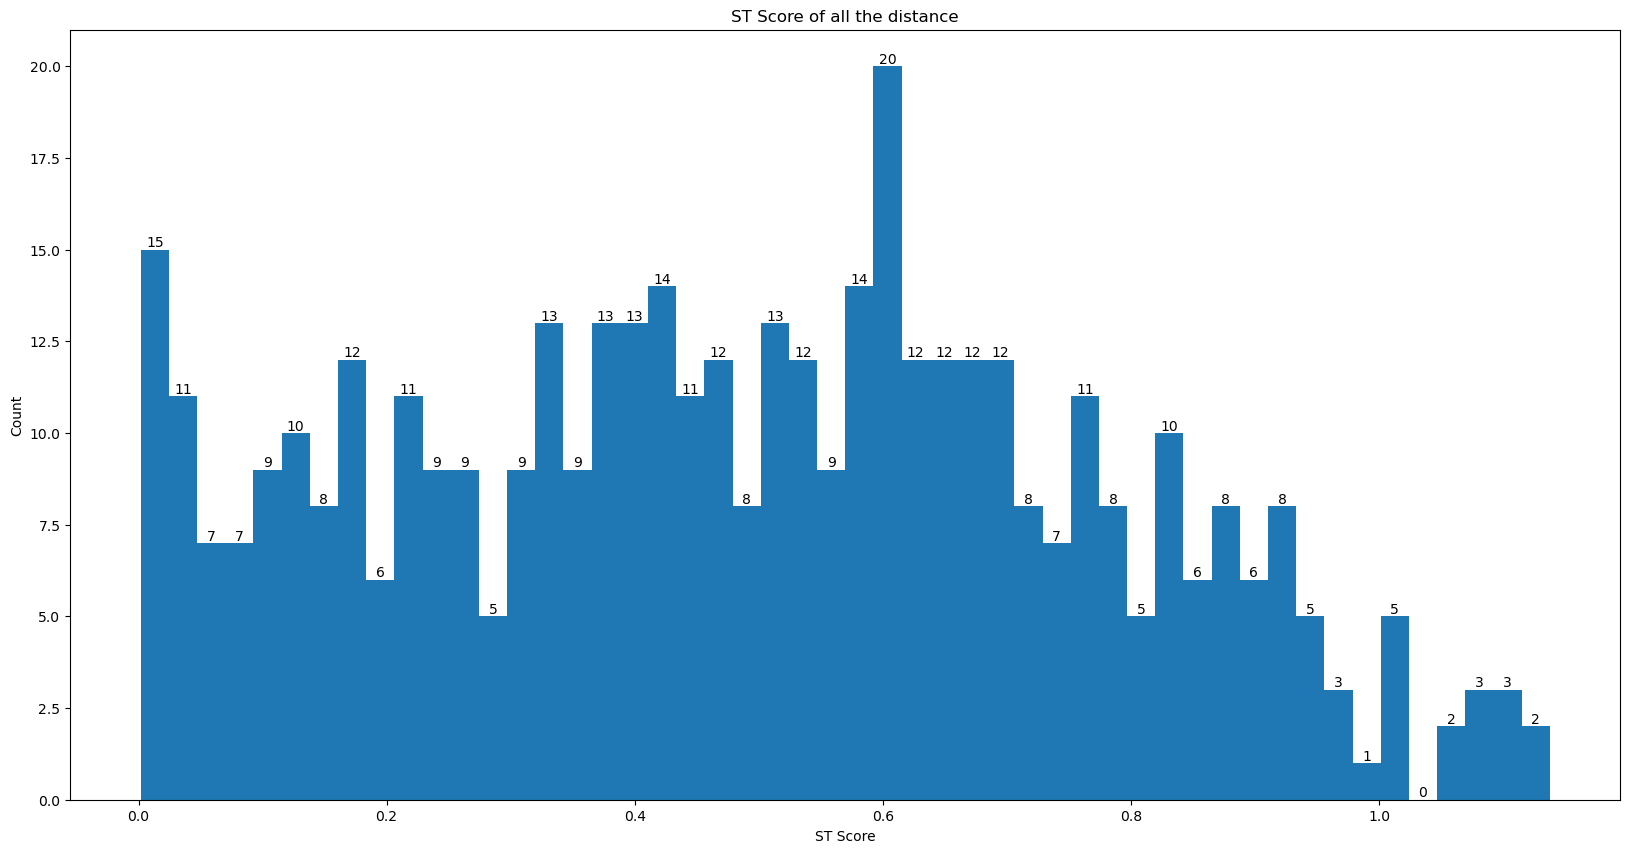

In [24]:
plt.figure(figsize = (20,10))
plt.title("ST Score of all the distance")
counts, edges, bars = plt.hist(pd_Roman["ST Score"], bins = 50)
plt.xlabel("ST Score")
plt.ylabel("Count")
plt.bar_label(bars)

[Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

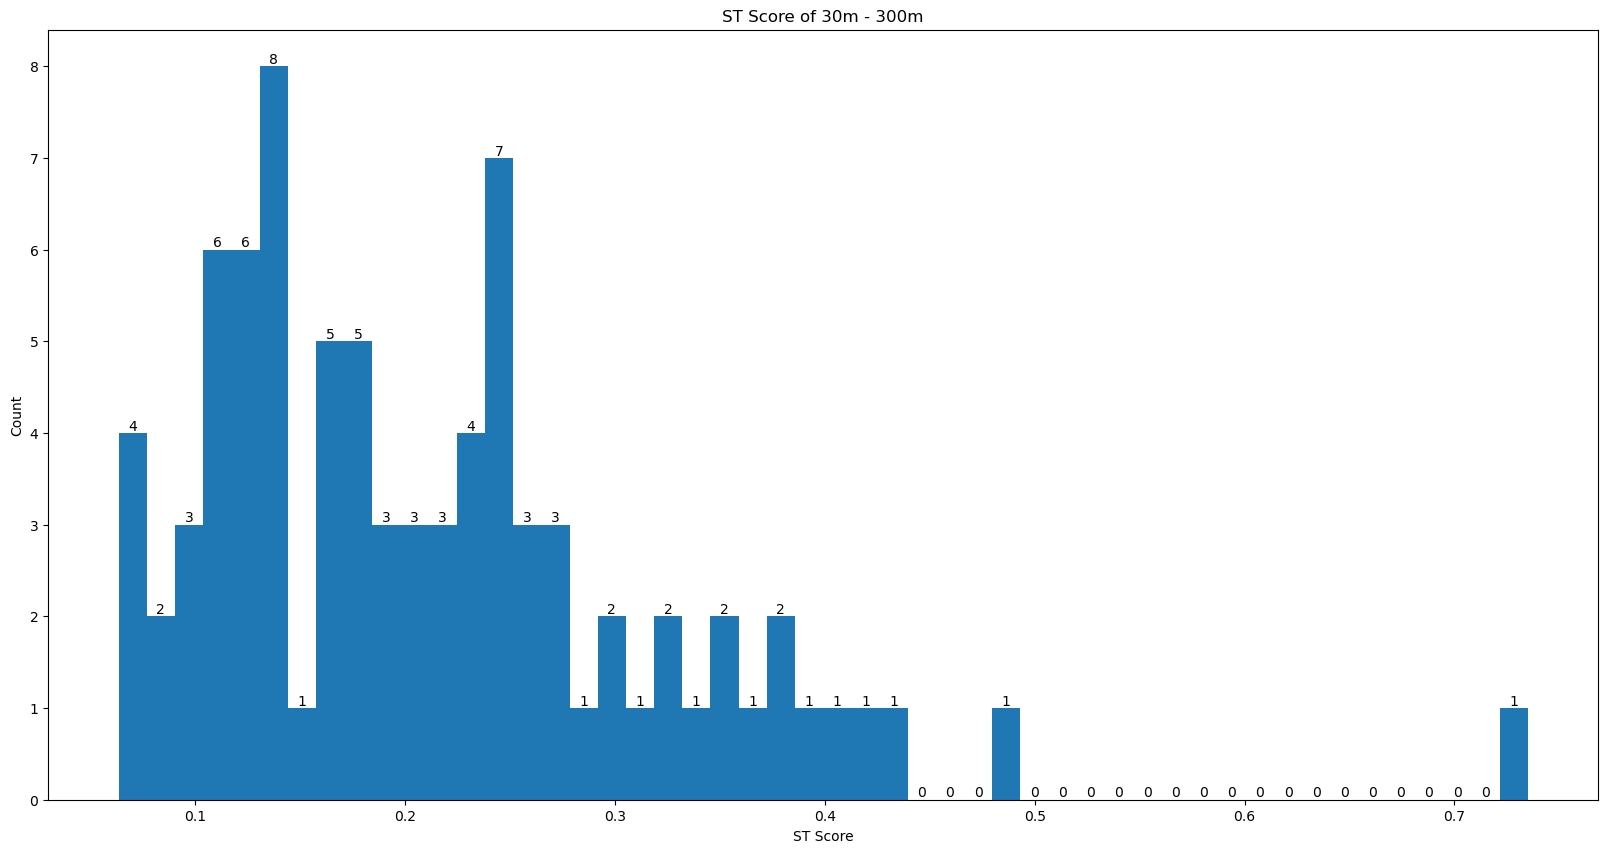

In [20]:
plt.figure(figsize = (20,10))
plt.title("ST Score of 30m - 300m")
counts, edges, bars = plt.hist(pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == 30) & (pd_Roman['External Distance'] == 300))]['ST Score'], bins = 50)
plt.xlabel("ST Score")
plt.ylabel("Count")
plt.bar_label(bars)

In [22]:
pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == 30) & (pd_Roman['External Distance'] == 300))]['ST Score'].describe()

count    84.000000
mean      0.214677
std       0.112572
min       0.063355
25%       0.130498
50%       0.193168
75%       0.265136
max       0.734926
Name: ST Score, dtype: float64

[Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '6'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '7'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '3')]

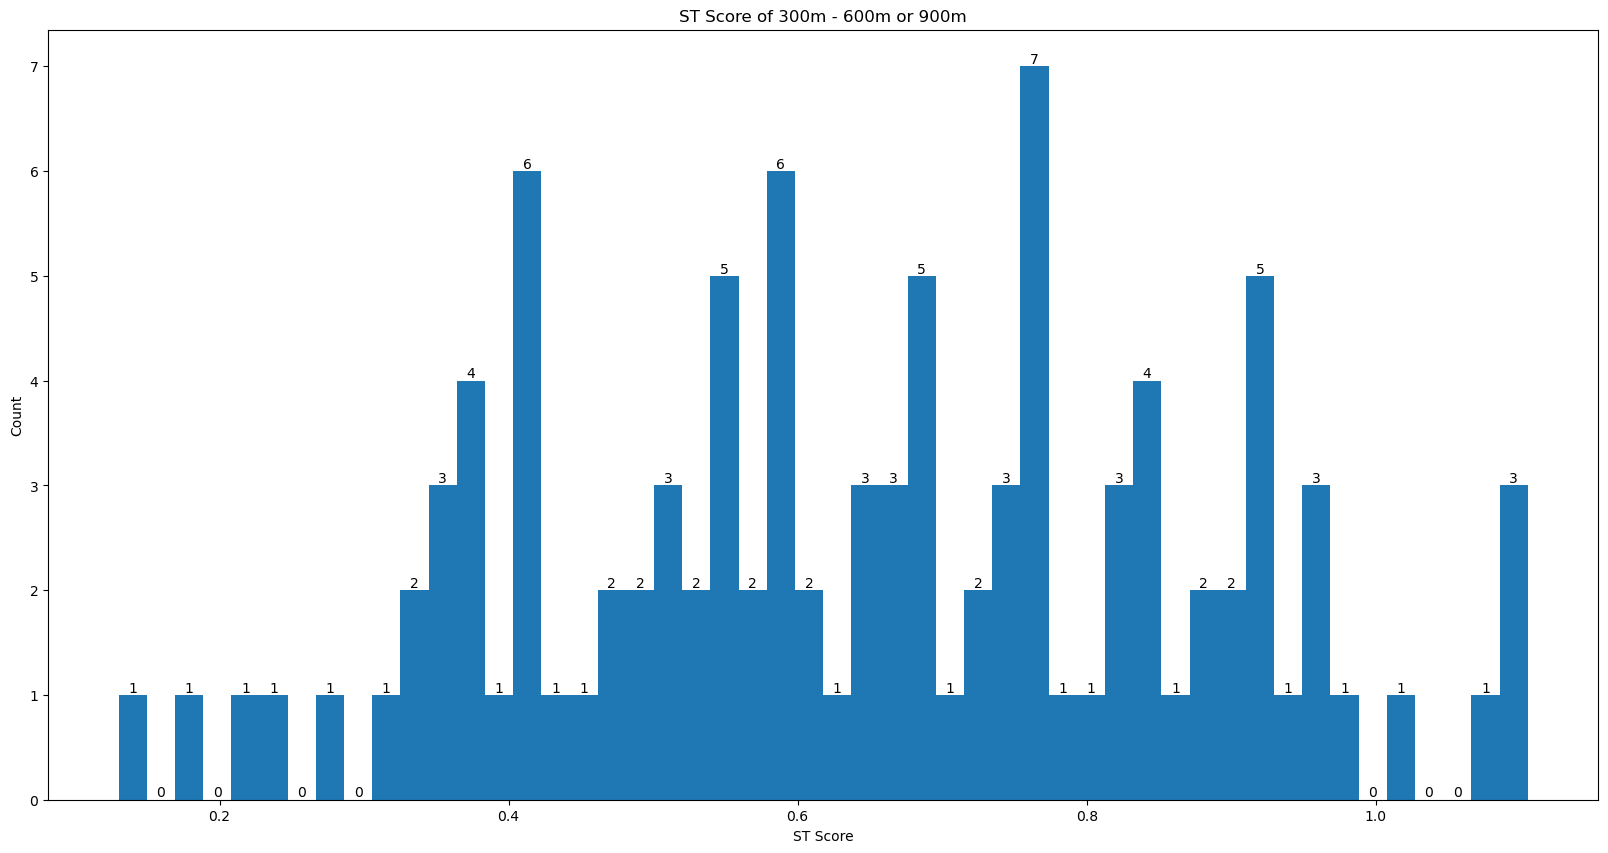

In [23]:
plt.figure(figsize = (20,10))
plt.title("ST Score of 300m - 600m or 900m")
counts, edges, bars = plt.hist(pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == 300) & (pd_Roman['External Distance'].isin([900,600])))]['ST Score'], bins = 50)
plt.xlabel("ST Score")
plt.ylabel("Count")
plt.bar_label(bars)

In [24]:
pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == 300) & (pd_Roman['External Distance'].isin([900,600])))]['ST Score'].describe()

count    102.000000
mean       0.645459
std        0.224279
min        0.130185
25%        0.482335
50%        0.647924
75%        0.812755
max        1.105070
Name: ST Score, dtype: float64